In [1]:
!pip install jovian --upgrade --quiet
!pip install numpy --upgrade --quiet
!pip install pandas --upgrade --quiet

!pip install wordcloud --upgrade --quiet
!pip install emoji  --upgrade --quiet
!pip install plotly_express --upgrade --quiet

     |████████████████████████████████| 71kB 3.4MB/s 
     |████████████████████████████████| 368kB 5.0MB/s 
     |████████████████████████████████| 133kB 3.6MB/s 


In [2]:
import plotly.express as px
import os
import pandas as pd
import re
import datetime as time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import emoji
import re
from collections import Counter
from wordcloud import WordCloud, STOPWORDS


In [3]:
# whatsapp_df = pd.read_fwf('chat.txt',header=None)

# whatsapp_df.head()

In [4]:
# whatsapp_df.info()

In [5]:
# whatsapp_df.shape

In [6]:
# whatsapp_df.drop(whatsapp_df.iloc[:,2:],inplace = True, axis = 1)

In [7]:
# whatsapp_df.shape

In [8]:
file=open('chat.txt',mode='r',encoding="utf8")
data=file.read()
file.close()
messages=re.findall('(\d+/\d+/\d+, \d+:\d+ [a-z]*) - (.*): (.*)',data)
messages

[('08/06/2019, 4:34 pm', 'Akarshit', '..'),
 ('08/06/2019, 6:13 pm', 'Bhavya', 'Chooor'),
 ('08/06/2019, 6:13 pm', 'Akarshit', '😎'),
 ('08/06/2019, 8:15 pm', 'Akarshit', '<Media omitted>'),
 ('08/06/2019, 8:27 pm', 'Bhavya', '🤣🤣'),
 ('08/06/2019, 10:25 pm', 'Akarshit', '..'),
 ('08/06/2019, 10:25 pm', 'Bhavya', '..'),
 ('08/06/2019, 10:25 pm', 'Bhavya', 'Choooor'),
 ('08/06/2019, 10:26 pm', 'Akarshit', 'Kya krr rha hai'),
 ('08/06/2019, 10:26 pm', 'Akarshit', '?'),
 ('08/06/2019, 10:26 pm', 'Bhavya', 'Practical'),
 ('08/06/2019, 10:26 pm', 'Akarshit', '😕'),
 ('08/06/2019, 10:26 pm', 'Bhavya', '<Media omitted>'),
 ('08/06/2019, 10:26 pm', 'Akarshit', 'Bitch'),
 ('08/06/2019, 10:26 pm', 'Bhavya', '<Media omitted>'),
 ('08/06/2019, 10:26 pm', 'Akarshit', '😂'),
 ('08/06/2019, 10:27 pm', 'Akarshit', 'Yrrr boor ho gya mei'),
 ('08/06/2019, 10:27 pm', 'Bhavya', 'Utkarsh ko krle phpne'),
 ('08/06/2019, 10:27 pm', 'Bhavya', 'Vo bhi vela hoga'),
 ('08/06/2019, 10:27 pm', 'Akarshit', 'Haan'),
 ('

In [9]:
def txttodf(txt_file):
  file=open(txt_file,mode='r',encoding="utf8")
  data=file.read()
  file.close()
  messages=re.findall('(\d+/\d+/\d+, \d+:\d+ [a-z]*) - (.*?): (.*)',data)
  # *? to ensure only name is taken non-greedy
  user     = []; 
  message  = []; 
  datetime = []
  for item in messages:
    datetime.append(item[0])
    user.append(item[1])
    message.append(item[2])
  df=pd.DataFrame(zip(datetime, user, message), columns=['datetime', 'user', 'message'])
  df['datetime'] = pd.to_datetime(df.datetime, format='%d/%m/%Y, %I:%M %p')
  return df




In [10]:
whatsapp_df=txttodf('chat.txt')

In [11]:
# messages = re.findall('(\d+/\d+/\d+, \d+:\d+ [a-z]*) - (.*): (.*)', data)
# user     = []; 
# message  = []; 
# datetime = []
# # df['date'] = pd.to_datetime(df['date'],format="%m/%d/%y, %I:%M %p")
# messages[:10]
# # df.head(4)
# # df.shape

In [12]:

whatsapp_df


,datetime,user,message
0,2019-06-08 16:34:00,Akarshit,..
1,2019-06-08 18:13:00,Bhavya,Chooor
2,2019-06-08 18:13:00,Akarshit,😎
3,2019-06-08 20:15:00,Akarshit,<Media omitted>
4,2019-06-08 20:27:00,Bhavya,🤣🤣
...,...,...,...
11637,2021-01-26 20:10:00,Bhavya,Hojaunga pass
11638,2021-01-26 20:12:00,Akarshit,Kl chlega khelne?
11639,2021-01-26 20:31:00,Bhavya,<Media omitted>
11640,2021-01-26 20:31:00,Bhavya,😂


In [13]:
img=whatsapp_df[whatsapp_df['message']=="<Media omitted>"]
img.shape

(2987, 3)

In [14]:
whatsapp_df.drop(img.index,inplace=True)

In [15]:
totalnumberofmessages=whatsapp_df.message.count()

In [16]:
totalnumberofmessages
whatsapp_df.reset_index(inplace=True, drop=True)

In [17]:
username=whatsapp_df['user'].unique()

In [18]:
print(username)

['Akarshit' 'Bhavya']


In [19]:
whatsapp_df1=whatsapp_df.copy()
whatsapp_df1['Number_of_messages'] = 1
whatsapp_df1 = whatsapp_df1.groupby('user')['Number_of_messages'].count().reset_index()
whatsapp_df1


,user,Number_of_messages
0,Akarshit,3896
1,Bhavya,4759


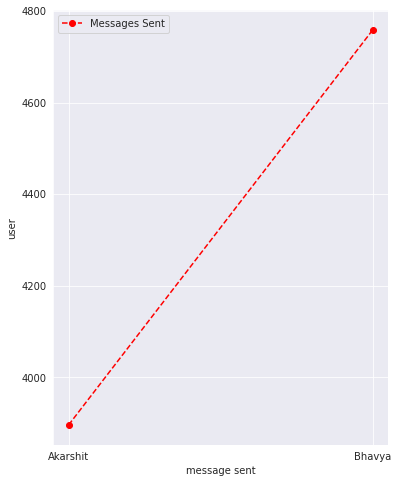

In [20]:
sns.set_style("darkgrid")
plt.figure(figsize=(6,8))
plt.plot(whatsapp_df1.user,whatsapp_df1.Number_of_messages,'o--r')
plt.xlabel('message sent')
plt.ylabel('user')
plt.legend(['Messages Sent'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Figure size 576x432 with 0 Axes>

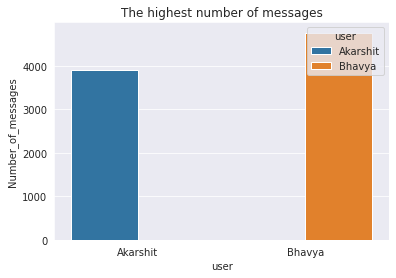

<Figure size 576x432 with 0 Axes>

In [21]:
sns.barplot(whatsapp_df1.user,whatsapp_df1.Number_of_messages,hue='user',data=whatsapp_df1);
plt.title("The highest number of messages");
plt.figure(figsize=(8,6))

In [22]:
whatsapp_df2=whatsapp_df.copy()

emoji_count=Counter()

emojis_list=map(lambda x : ' '.join(x.split()),emoji.UNICODE_EMOJI.keys())


r=re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in whatsapp_df2.iterrows():
    emojis_found = r.findall(row["message"]) #The findall() is a functions for regex that help to find a matches 
    for emoji_found in emojis_found:
        emoji_count[emoji_found] += 1

Most active hours

In [23]:
whatsapp_df3=whatsapp_df.copy()
whatsapp_df3['no_of_messages']=1
whatsapp_df3['hours']=whatsapp_df3['datetime'].apply(lambda x : x.hour)

time_df=whatsapp_df3.groupby('hours').count().reset_index().sort_values(by='no_of_messages')

time_df


    

,hours,datetime,user,message,no_of_messages
8,8,17,17,17,17
7,7,51,51,51,51
9,9,69,69,69,69
12,12,82,82,82,82
10,10,96,96,96,96
11,11,101,101,101,101
6,6,110,110,110,110
16,16,110,110,110,110
13,13,165,165,165,165
17,17,188,188,188,188


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



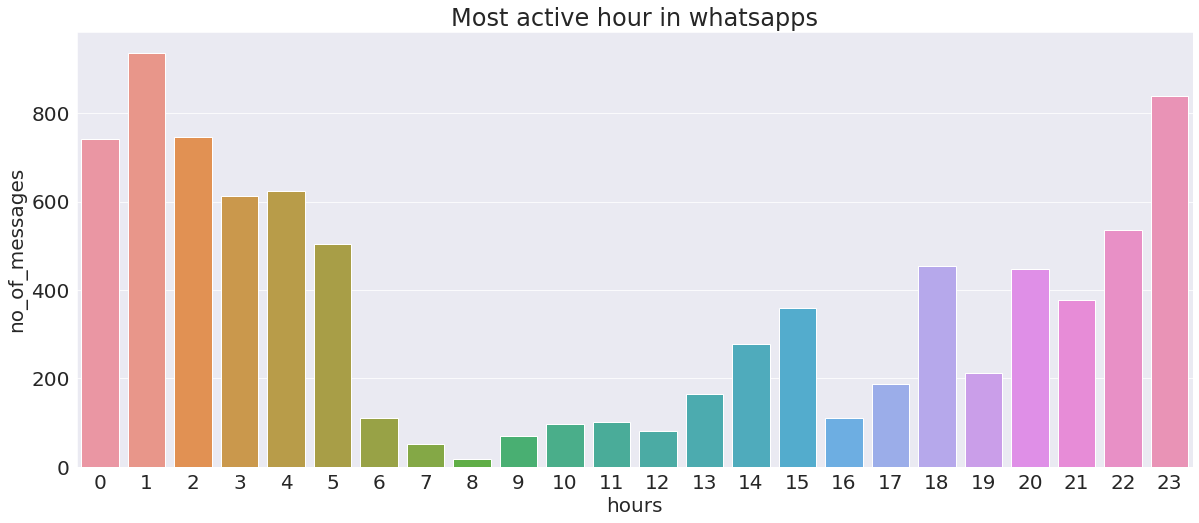

In [24]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (20, 8)

plt.title('Most active hour in whatsapps');
sns.barplot(time_df.hours,time_df.no_of_messages,data = time_df)


In [25]:
whatsapp_df5=whatsapp_df.copy()

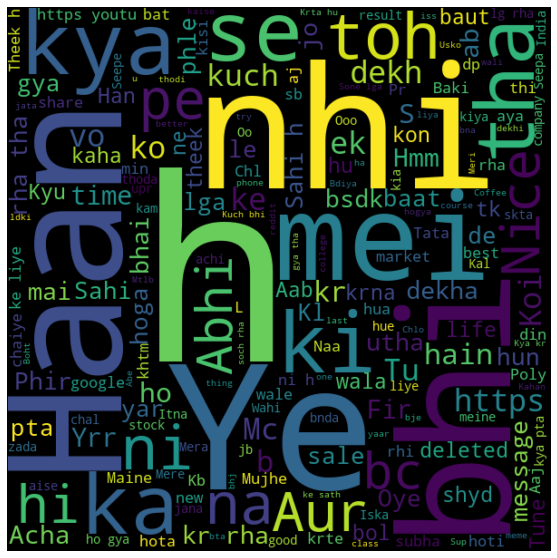

In [26]:
word = " ".join(x for x in whatsapp_df5.message)

stopwords = set(STOPWORDS)

#delete the word/text that are commonly used(eg.the,yes,no,bye,or and is)
stopwords.update(["the","is","yea","ok","okay","or","bye","no","will","yeah","I","almost","if","me","you","done","want","Ya","hai"])

#Creating a word cloud 
wordcloud = WordCloud(width = 600, height =600 ,stopwords=stopwords, background_color="black",min_font_size = 2).generate(word)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




In [27]:

re.findall('Arushi',data)

['Arushi', 'Arushi', 'Arushi']